In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [331]:
df = pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [332]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [333]:
age_fare_df = df[['Age', 'Fare']]
age_fare_df.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [334]:
age_fare_df.skew()

Age     0.389108
Fare    4.787317
dtype: float64

In [335]:
from sklearn.preprocessing import PowerTransformer

In [336]:
transformer = PowerTransformer()
age_fare_transformed = transformer.fit_transform(age_fare_df)

In [337]:
age_fare_df_new = pd.DataFrame(age_fare_transformed, columns=['Age', 'Fare'])

In [338]:
age_fare_df_new.skew()

Age    -0.027055
Fare   -0.040329
dtype: float64

Visualize the distributions of Age and Fare before and after transformations.

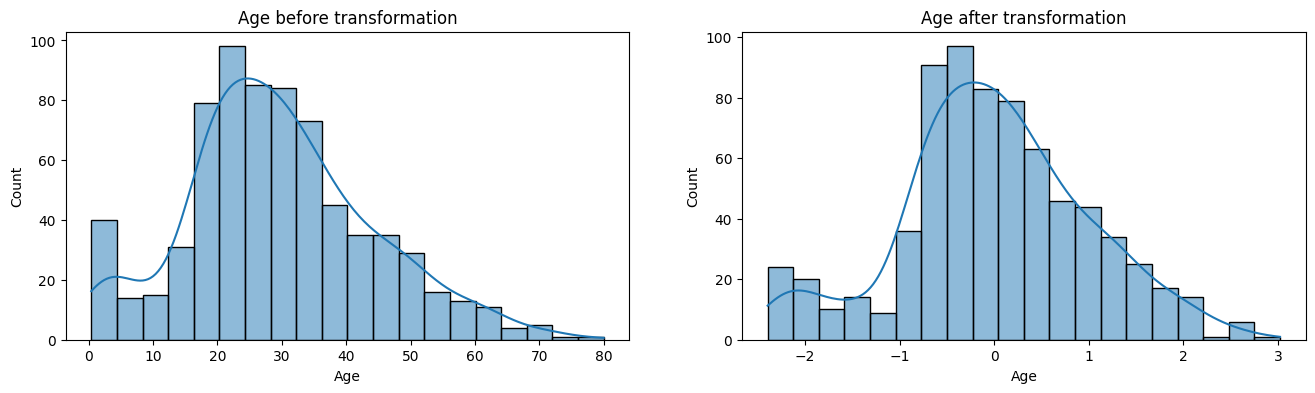

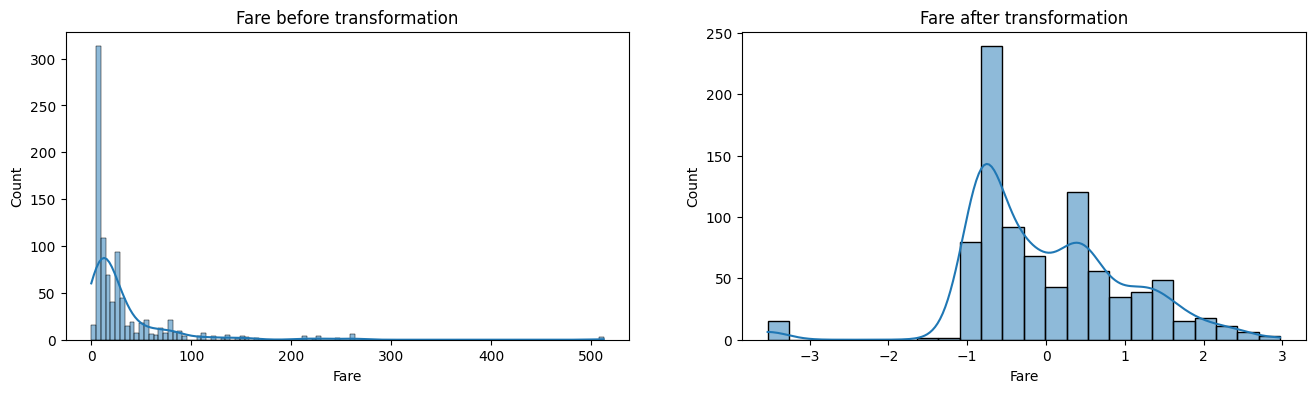

In [339]:
for column in age_fare_df.columns:

    plt.figure(figsize=(16,4))
    plt.subplot(121)
    sns.histplot(age_fare_df[column], kde=True)
    plt.title(f'{column} before transformation')

    plt.subplot(122)
    sns.histplot(age_fare_df_new[column], kde=True)
    plt.title(f'{column} after transformation')

    plt.show()